# [Pandas Cookbook](https://pandas.pydata.org/pandas-docs/stable/cookbook.html)

In [1]:
import pandas as pd
import numpy as np

## [Idioms](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#idioms)

### [If-then-else](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#if-then)

[Override calculations and reassign variables:](https://stackoverflow.com/questions/17128302/python-pandas-idiom-for-if-then-else)

In [2]:
df = pd.DataFrame({'AAA' : [4,5,6,7],
                  'BBB' : [10,20,30,40],
                  'CCC' : [100,50,-30,-50]})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


Execute an if-then statement on one column:

In [3]:
# If AAA >= 5, BBB = -1
df.loc[df.AAA >= 5, 'BBB'] = -1; df

,AAA,BBB,CCC
0,4,10,100
1,5,-1,50
2,6,-1,-30
3,7,-1,-50


If-then with assignment to 2 columns:

In [4]:
df.loc[df.AAA >= 5, ['BBB','CCC']] = 555; df

,AAA,BBB,CCC
0,4,10,100
1,5,555,555
2,6,555,555
3,7,555,555


Now you can perform another operation on the first row:

In [5]:
df.loc[df.AAA < 5, ['BBB', 'CCC']] = 2000; df

,AAA,BBB,CCC
0,4,2000,2000
1,5,555,555
2,6,555,555
3,7,555,555


You can also use pandas after setting up a mask:

In [6]:
df_mask = pd.DataFrame({'AAA' : [True] * 4, 'BBB' : [False] * 4, 'CCC' : [True,False] * 2})
df_mask

,AAA,BBB,CCC
0,True,False,True
1,True,False,False
2,True,False,True
3,True,False,False


In [7]:
df.where(df_mask, -1000)

,AAA,BBB,CCC
0,4,-1000,2000
1,5,-1000,-1000
2,6,-1000,555
3,7,-1000,-1000


[Use numpy's where() to perform an if-then-else operation](https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column).  
In other words, the conditional creation of a DataFrame column:

In [8]:
df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40], 'CCC' : [100,50,-30,-50]}); df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [9]:
# New column -- if AAA > 5, then high, else low:
df['logic'] = np.where(df['AAA'] > 5,'high','low'); df

,AAA,BBB,CCC,logic
0,4,10,100,low
1,5,20,50,low
2,6,30,-30,high
3,7,40,-50,high


### [Splitting](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#splitting)

[Split a frame based on a boolean value:](https://stackoverflow.com/questions/14957116/how-to-split-a-dataframe-according-to-a-boolean-criterion)

In [10]:
df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40], 'CCC' : [100,50,-30,-50]}); df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [11]:
df_low = df[df.AAA <= 5]; df_low

,AAA,BBB,CCC
0,4,10,100
1,5,20,50


In [12]:
df_high = df[df.AAA > 5]; df_high

,AAA,BBB,CCC
2,6,30,-30
3,7,40,-50


### [Building Criteria](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#building-criteria)

[Select with multi-column criteria:](https://stackoverflow.com/questions/15315452/selecting-with-complex-criteria-from-pandas-dataframe)

In [13]:
df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]}); df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [14]:
# And operation without assignment:
newseries = df.loc[(df['BBB'] < 25) & (df['CCC'] >= -40), 'AAA']; newseries

0    4
1    5
Name: AAA, dtype: int64

In [15]:
# Or operation without assignment:
newseries = df.loc[(df['BBB'] > 25) | (df['CCC'] >= -40), 'AAA']; newseries

0    4
1    5
2    6
3    7
Name: AAA, dtype: int64

In [16]:
# Or operation with assignment modifies the dataframe:
df.loc[(df['BBB'] > 25) | (df['CCC'] >= 75), 'AAA'] = 0.1; df

,AAA,BBB,CCC
0,0.1,10,100
1,5.0,20,50
2,0.1,30,-30
3,0.1,40,-50


[Select the rows with data that's closest to a target value:](https://stackoverflow.com/questions/17758023/return-rows-in-a-dataframe-closest-to-a-user-defined-number)

In [17]:
df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]}); df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [18]:
aValue = 43.0
df.loc[(df.CCC-aValue).abs().argsort()]

,AAA,BBB,CCC
1,5,20,50
0,4,10,100
2,6,30,-30
3,7,40,-50


[Dynamically reduce a list of criteria using binary operators](https://stackoverflow.com/questions/21058254/pandas-boolean-operation-in-a-python-list/21058331)

In [19]:
df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40], 'CCC' : [100,50,-30,-50]}); df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [20]:
Crit1 = df.AAA <= 5.5; Crit1

0     True
1     True
2    False
3    False
Name: AAA, dtype: bool

In [21]:
Crit2 = df.BBB == 10.0; Crit2

0     True
1    False
2    False
3    False
Name: BBB, dtype: bool

In [22]:
Crit3 = df.CCC > -40.0; Crit3

0     True
1     True
2     True
3    False
Name: CCC, dtype: bool

If you want to hard code a solution:

In [23]:
AllCrit = Crit1 & Crit2 & Crit3; AllCrit

0     True
1    False
2    False
3    False
dtype: bool

You may want to work with a list of dynamically built criteria:

In [24]:
CritList = [Crit1,Crit2,Crit3]; CritList

[0     True
 1     True
 2    False
 3    False
 Name: AAA, dtype: bool, 0     True
 1    False
 2    False
 3    False
 Name: BBB, dtype: bool, 0     True
 1     True
 2     True
 3    False
 Name: CCC, dtype: bool]

In [25]:
import functools

AllCrit = functools.reduce(lambda x,y: x & y, CritList); AllCrit

0     True
1    False
2    False
3    False
dtype: bool

In [26]:
df[AllCrit]

,AAA,BBB,CCC
0,4,10,100


## [Selection](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#selection)

### DataFrames

Ladies and gentleman, [The Indexing Documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing)

[Pandas using row labels in boolean indexing](https://stackoverflow.com/questions/14725068/pandas-using-row-labels-in-boolean-indexing)

In [27]:
# Using both row labels and value conditionals:
df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40], 'CCC' : [100,50,-30,50]}); df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,50


In [28]:
df[(df.AAA <= 6) & (df.index.isin([0,2,4]))]

,AAA,BBB,CCC
0,4,10,100
2,6,30,-30


[Use `loc` for label-oriented slicing and `iloc` for positional slicing](https://github.com/pandas-dev/pandas/issues/2904)

In [29]:
data = {'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40], 'CCC' : [100,50,-30,50]}
pd.DataFrame(data)

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,50


In [30]:
df = pd.DataFrame(data=data,index=['foo','bar','goo','car']); df

,AAA,BBB,CCC
foo,4,10,100
bar,5,20,50
goo,6,30,-30
car,7,40,50


There are two explicit slicing methods and an available third option:
1. Positional-oriented ( Python slicing style : exclusive end )
2. Label-oriented ( Non-Python slicing style : inclusive end )
3. General ( Either slicing style : depends on slicing on labels or positions )

In [31]:
# Label-oriented:
df.loc['bar' : 'car']

,AAA,BBB,CCC
bar,5,20,50
goo,6,30,-30
car,7,40,50


In [32]:
# Positional-oriented:
df.iloc[0:3]

,AAA,BBB,CCC
foo,4,10,100
bar,5,20,50
goo,6,30,-30


Ambiguity arises when an index consists of integers with a non-zero start or non-unit increment.

In [33]:
# Begin index at 1 instead of 0
df2 = pd.DataFrame(data=data,index=[1,2,3,4]); df2

,AAA,BBB,CCC
1,4,10,100
2,5,20,50
3,6,30,-30
4,7,40,50


In [34]:
df2.iloc[1:3]

,AAA,BBB,CCC
2,5,20,50
3,6,30,-30


In [35]:
df2.loc[1:3]

,AAA,BBB,CCC
1,4,10,100
2,5,20,50
3,6,30,-30


[Using the inverse operator `~` to take the complement of a mask](https://stackoverflow.com/questions/14986510/picking-out-elements-based-on-complement-of-indices-in-python-pandas)

In [36]:
df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40], 'CCC' : [100,50,-30,-50]}); df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [37]:
df[~((df.AAA <= 6) & (df.index.isin([0,2,4])))]

,AAA,BBB,CCC
1,5,20,50
3,7,40,-50


### Panels

[Extend a panel frame by transposing, adding a new dimension, and transposing back to the original dimensions](https://stackoverflow.com/questions/15364050/extending-a-pandas-panel-frame-along-the-minor-axis)

In [38]:
rng = pd.date_range('1/1/2018',periods=100,freq='D')

In [39]:
data = np.random.randn(100,4)

In [40]:
print(rng[:5])
print()
print(data[:5])
cols = ['A','B','C','D']; cols

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05'],
              dtype='datetime64[ns]', freq='D')

[[ 0.45867246 -0.58016838  1.81372486  1.17350787]
 [-0.48724949 -0.21505442 -0.0705428   1.11515514]
 [ 2.61029565 -0.60758408 -1.29735507  0.8684929 ]
 [-0.54867991 -1.72151102 -0.09690682 -1.56794778]
 [ 0.37772141  0.15539484  0.87702622 -0.13842111]]


['A', 'B', 'C', 'D']

In [41]:
# Another reason why Python is so wonderful:
df1, df2, df3 = pd.DataFrame(data, rng, cols), pd.DataFrame(data, rng, cols), pd.DataFrame(data, rng, cols)
df1[:5]

,A,B,C,D
2018-01-01,0.458672,-0.580168,1.813725,1.173508
2018-01-02,-0.487249,-0.215054,-0.070543,1.115155
2018-01-03,2.610296,-0.607584,-1.297355,0.868493
2018-01-04,-0.548680,-1.721511,-0.096907,-1.567948
2018-01-05,0.377721,0.155395,0.877026,-0.138421


In [42]:
pf = pd.Panel({'df1':df1,'df2':df2,'df3':df3});pf

<class 'pandas.core.panel.Panel'>
Dimensions: 3 (items) x 100 (major_axis) x 4 (minor_axis)
Items axis: df1 to df3
Major_axis axis: 2018-01-01 00:00:00 to 2018-04-10 00:00:00
Minor_axis axis: A to D

In [43]:
pf.loc[:,:,'F'] = pd.DataFrame(data,rng,cols);pf

<class 'pandas.core.panel.Panel'>
Dimensions: 3 (items) x 100 (major_axis) x 5 (minor_axis)
Items axis: df1 to df3
Major_axis axis: 2018-01-01 00:00:00 to 2018-04-10 00:00:00
Minor_axis axis: A to F

### New Columns

[Create new columns using `applymap()`](https://stackoverflow.com/questions/16575868/efficiently-creating-additional-columns-in-a-pandas-dataframe-using-map)

In [44]:
df = pd.DataFrame({'AAA' : [1,2,1,3], 'BBB' : [1,1,2,2], 'CCC' : [2,1,3,1]}); df

,AAA,BBB,CCC
0,1,1,2
1,2,1,1
2,1,2,3
3,3,2,1


In [45]:
source_cols = df.columns  # any subset would work
source_cols

Index(['AAA', 'BBB', 'CCC'], dtype='object')

In [46]:
new_cols = [str(x) + "_cat" for x in source_cols]
new_cols

['AAA_cat', 'BBB_cat', 'CCC_cat']

In [47]:
categories = { 1 : 'Alpha', 2 : 'Beta', 3 : 'Charlie' }
df[new_cols] = df[source_cols].applymap(categories.get); df

,AAA,BBB,CCC,AAA_cat,BBB_cat,CCC_cat
0,1,1,2,Alpha,Alpha,Beta
1,2,1,1,Beta,Alpha,Alpha
2,1,2,3,Alpha,Beta,Charlie
3,3,2,1,Charlie,Beta,Alpha


[Keep other columns when using `min()` with `groupby`](https://stackoverflow.com/questions/23394476/keep-other-columns-when-using-min-with-groupby)

In [48]:
df = pd.DataFrame({'AAA' : [1,1,1,2,2,2,3,3], 'BBB' : [2,1,3,4,5,1,2,3]}); df

,AAA,BBB
0,1,2
1,1,1
2,1,3
3,2,4
4,2,5
5,2,1
6,3,2
7,3,3


In [49]:
# Method 1 -- use idxmin() to get the index of the mins:
df.loc[df.groupby('AAA')['BBB'].idxmin()]

,AAA,BBB
1,1,1
5,2,1
6,3,2


In [50]:
# Method 2 -- sort the entries, then take the first of each.
# Notice that the resulting dataframe is the same except for the index.
df.sort_values(by='BBB').groupby('AAA', as_index=False).first()

,AAA,BBB
0,1,1
1,2,1
2,3,2


## [MultiIndexing](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#multiindexing)

Ladies and Gentleman, The [MultiIndexing Documentation](https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical).

[Creating a multi-index from a labeled frame](https://stackoverflow.com/questions/14916358/reshaping-dataframes-in-pandas-based-on-column-labels)

In [51]:
df = pd.DataFrame({'Row' : [0,1,2],
                 'one_X' : [1.1,1.1,1.1],
                 'one_Y' : [1.2,1.2,1.2],
                 'two_X' : [1.11,1.11,1.11],
                 'two_Y' : [1.22,1.22,1.22]})
df

,Row,one_X,one_Y,two_X,two_Y
0,0,1.1,1.2,1.11,1.22
1,1,1.1,1.2,1.11,1.22
2,2,1.1,1.2,1.11,1.22


In [52]:
# As a labeled index:
df = df.set_index('Row'); df

,one_X,one_Y,two_X,two_Y
Row,,,,
0,1.1,1.2,1.11,1.22
1,1.1,1.2,1.11,1.22
2,1.1,1.2,1.11,1.22


In [53]:
# With hierarchical columns:
df.columns = pd.MultiIndex.from_tuples([tuple(c.split('_')) for c in df.columns]); df

one        two      
       X    Y     X     Y
Row                      
0    1.1  1.2  1.11  1.22
1    1.1  1.2  1.11  1.22
2    1.1  1.2  1.11  1.22

In [54]:
# Now you can stack and reset them:
df = df.stack(0).reset_index(1); df

,level_1,X,Y
Row,,,
0,one,1.10,1.20
0,two,1.11,1.22
1,one,1.10,1.20
1,two,1.11,1.22
2,one,1.10,1.20
2,two,1.11,1.22


In [55]:
# Notice how the label 'level_1' got added for you in the DataFrame above.
# You can fix your own labels, too:
df.columns = ['Sample','All_X', 'All_Y']; df

,Sample,All_X,All_Y
Row,,,
0,one,1.10,1.20
0,two,1.11,1.22
1,one,1.10,1.20
1,two,1.11,1.22
2,one,1.10,1.20
2,two,1.11,1.22


### Arithmetic

[Performing arithmetic with a multi-index that needs broadcasting](https://stackoverflow.com/questions/19501510/divide-entire-pandas-multiindex-dataframe-by-dataframe-variable/19502176#19502176)

In [56]:
cols = pd.MultiIndex.from_tuples([(x,y) for x in ['A','B','C'] for y in ['O','I']]); cols

MultiIndex(levels=[['A', 'B', 'C'], ['I', 'O']],
           labels=[[0, 0, 1, 1, 2, 2], [1, 0, 1, 0, 1, 0]])

In [57]:
df = pd.DataFrame(cols); df

,0
0,"(A, O)"
1,"(A, I)"
2,"(B, O)"
3,"(B, I)"
4,"(C, O)"
5,"(C, I)"


In [58]:
df = pd.DataFrame(np.random.randn(2,6),index=['n','m'],columns=cols); df

A                   B                   C          
          O         I         O         I         O         I
n  0.890349  1.044317  0.668308 -0.997614  0.500878 -0.104416
m  0.622779 -0.191188  0.599774  0.847826  1.738464  1.552438

In [59]:
df = df.div(df['C'],level=1); df

A                    B              C     
          O          I         O         I    O    I
n  1.777574 -10.001553  1.334272  9.554266  1.0  1.0
m  0.358235  -0.123154  0.345002  0.546125  1.0  1.0

In [60]:
df = df.div(df['B'],level=1); df

A              B              C          
          O         I    O    I         O         I
n  1.332242 -1.046815  1.0  1.0  0.749472  0.104665
m  1.038356 -0.225504  1.0  1.0  2.898530  1.831082

## [Slicing](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#slicing)

[Slicing a multi-index with `xs`](https://stackoverflow.com/questions/12590131/how-to-slice-multindex-columns-in-pandas-dataframes)

In [61]:
coords = [('AA','one'),('AA','six'),('BB','one'),('BB','two'),('BB','six')]
df = pd.DataFrame(coords); df

,0,1
0,AA,one
1,AA,six
2,BB,one
3,BB,two
4,BB,six


In [62]:
index = pd.MultiIndex.from_tuples(coords); index

MultiIndex(levels=[['AA', 'BB'], ['one', 'six', 'two']],
           labels=[[0, 0, 1, 1, 1], [0, 1, 0, 2, 1]])

In [63]:
df = pd.DataFrame(index); df

,0
0,"(AA, one)"
1,"(AA, six)"
2,"(BB, one)"
3,"(BB, two)"
4,"(BB, six)"


In [64]:
df = pd.DataFrame([11,22,33,44,55],index,['MyData']); df

MyData
AA one      11
   six      22
BB one      33
   two      44
   six      55

In [65]:
# Take the cross section of the 1st level and 1st axis
df.xs('BB',level=0,axis=0)

,MyData
one,33
two,44
six,55


In [66]:
# Now take the 2nd level of the first axis
df.xs('six',level=1,axis=0)

,MyData
AA,22
BB,55


[Navigating the indices in a MultiIndex](https://stackoverflow.com/questions/14964493/multiindex-based-indexing-in-pandas)  
Another way to slice a multi-index using the `xs()` method.

In [67]:
import itertools

index = list(itertools.product(['Ada','Quinn','Violet'],['Comp','Math','Sci'])); index

[('Ada', 'Comp'),
 ('Ada', 'Math'),
 ('Ada', 'Sci'),
 ('Quinn', 'Comp'),
 ('Quinn', 'Math'),
 ('Quinn', 'Sci'),
 ('Violet', 'Comp'),
 ('Violet', 'Math'),
 ('Violet', 'Sci')]

In [68]:
headr = list(itertools.product(['Exams','Labs'],['I','II'])); headr

[('Exams', 'I'), ('Exams', 'II'), ('Labs', 'I'), ('Labs', 'II')]

In [69]:
indx = pd.MultiIndex.from_tuples(index,names=['Student','Course']); indx

MultiIndex(levels=[['Ada', 'Quinn', 'Violet'], ['Comp', 'Math', 'Sci']],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 2], [0, 1, 2, 0, 1, 2, 0, 1, 2]],
           names=['Student', 'Course'])

In [70]:
pd.DataFrame(indx)

,0
0,"(Ada, Comp)"
1,"(Ada, Math)"
2,"(Ada, Sci)"
3,"(Quinn, Comp)"
4,"(Quinn, Math)"
5,"(Quinn, Sci)"
6,"(Violet, Comp)"
7,"(Violet, Math)"
8,"(Violet, Sci)"


In [71]:
# Notice that the labelsin the cols multi-index are unnamed
cols = pd.MultiIndex.from_tuples(headr); cols

MultiIndex(levels=[['Exams', 'Labs'], ['I', 'II']],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [72]:
data = [[70+x+y+(x*y)%3 for x in range(4)] for y in range(9)]; data

[[70, 71, 72, 73],
 [71, 73, 75, 74],
 [72, 75, 75, 75],
 [73, 74, 75, 76],
 [74, 76, 78, 77],
 [75, 78, 78, 78],
 [76, 77, 78, 79],
 [77, 79, 81, 80],
 [78, 81, 81, 81]]

In [73]:
df = pd.DataFrame(data,indx,cols); df

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Comp      70  71   72  73
        Math      71  73   75  74
        Sci       72  75   75  75
Quinn   Comp      73  74   75  76
        Math      74  76   78  77
        Sci       75  78   78  78
Violet  Comp      76  77   78  79
        Math      77  79   81  80
        Sci       78  81   81  81

In [74]:
# https://stackoverflow.com/questions/38208416/colon-none-slicenone-in-numpy-array-indexers
All = slice(None); All

slice(None, None, None)

In [75]:
df.loc['Violet']

Exams     Labs    
           I  II    I  II
Course                   
Comp      76  77   78  79
Math      77  79   81  80
Sci       78  81   81  81

In [76]:
df.loc['Violet']

Exams     Labs    
           I  II    I  II
Course                   
Comp      76  77   78  79
Math      77  79   81  80
Sci       78  81   81  81

In [77]:
df.loc[(All,'Math'),All]

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Math      71  73   75  74
Quinn   Math      74  76   78  77
Violet  Math      77  79   81  80

In [78]:
df.loc[(slice('Ada','Quinn'),'Math'),All]

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Math      71  73   75  74
Quinn   Math      74  76   78  77

In [79]:
df.loc[(All,'Math'),('Exams')]

,,I,II
Student,Course,,
Ada,Math,71,73
Quinn,Math,74,76
Violet,Math,77,79


In [80]:
df.loc[(All,'Math'),(All,'II')]

,,Exams,Labs
,,II,II
Student,Course,,
Ada,Math,73,74
Quinn,Math,76,77
Violet,Math,79,80


Having fun yet?  
Check out [this Stack Overflow post](https://stackoverflow.com/questions/19319432/pandas-selecting-a-lower-level-in-a-dataframe-to-do-a-ffill) on how to tinker with the numbers on different levels of a MultiIndex.

## [Sorting](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#sorting)

[Using a `MultiIndex`, sort by a specific column or an ordered list of columns](https://stackoverflow.com/questions/14733871/multi-index-sorting-in-pandas)

In [81]:
df.sort_values(by=('Labs','II'),ascending=False)

Exams     Labs    
                   I  II    I  II
Student Course                   
Violet  Sci       78  81   81  81
        Math      77  79   81  80
        Comp      76  77   78  79
Quinn   Sci       75  78   78  78
        Math      74  76   78  77
        Comp      73  74   75  76
Ada     Sci       72  75   75  75
        Math      71  73   75  74
        Comp      70  71   72  73

### Levels

[Prepending a level to a multiindex](https://stackoverflow.com/questions/14744068/prepend-a-level-to-a-pandas-multiindex)  
[Flatten hiererchical columns](https://stackoverflow.com/questions/14507794/python-pandas-how-to-flatten-a-hierarchical-index-in-columns)

## [Missing Data](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#missing-data)

Ladies and Gentleman, [The Missing Data Documentation](https://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data).

Fill-forward a reversed timeseries:

In [82]:
df = pd.DataFrame(np.random.randn(6,1),
                 index=pd.date_range('2018-08-01',periods=6,freq='B'),
                 columns=list('A'))
df

,A
2018-08-01,0.503072
2018-08-02,-1.556884
2018-08-03,0.550963
2018-08-06,-0.598505
2018-08-07,-0.211836
2018-08-08,-0.594018


In [83]:
df.loc[df.index[3],'A'] = np.nan; df

,A
2018-08-01,0.503072
2018-08-02,-1.556884
2018-08-03,0.550963
2018-08-06,NaN
2018-08-07,-0.211836
2018-08-08,-0.594018


In [84]:
df.reindex(df.index[::-1]).ffill()

,A
2018-08-08,-0.594018
2018-08-07,-0.211836
2018-08-06,-0.211836
2018-08-03,0.550963
2018-08-02,-1.556884
2018-08-01,0.503072


[`cumsum` reset at NaN values](https://stackoverflow.com/questions/18196811/cumsum-reset-at-nan)

### Replace

[Using replace with backrefs](https://stackoverflow.com/questions/16818871/extracting-value-and-creating-new-column-out-of-it)

## [Grouping](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#grouping)

Gentleman and Ladies, [The `Group By` Docs](https://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby).

[Basic grouping using apply](https://stackoverflow.com/questions/15322632/python-pandas-df-groupby-agg-column-reference-in-agg)

Unlike [agg()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html), `apply`'s callable is passed a sub-`DataFrame` which gives you access to all of the columns.

In [85]:
df = pd.DataFrame({'animal' : 'cat dog cat fish dog cat cat'.split(),
                  'size' : list('SSMMMLL'),
                  'weight' : [8,10,11,1,20,12,12],
                  'adult' : [False] * 5 + [True] * 2})
df

,adult,animal,size,weight
0,False,cat,S,8
1,False,dog,S,10
2,False,cat,M,11
3,False,fish,M,1
4,False,dog,M,20
5,True,cat,L,12
6,True,cat,L,12


Now list the size of the animals with the highest weight.

In [86]:
df.groupby('animal').apply(lambda subf: subf['size'][subf['weight'].idxmax()])

animal
cat     L
dog     M
fish    M
dtype: object

Grouping using `get_group()`

In [87]:
gb = df.groupby(['animal'])
gb.get_group('cat')

,adult,animal,size,weight
0,False,cat,S,8
2,False,cat,M,11
5,True,cat,L,12
6,True,cat,L,12


[Apply to different items in a group](https://stackoverflow.com/questions/15262134/apply-different-functions-to-different-items-in-group-object-python-pandas)

In [88]:
def GrowUp(x):
    avg_weight = sum(x[x['size'] == 'S'].weight * 1.5)
    avg_weight += sum(x[x['size'] == 'M'].weight * 1.25)
    avg_weight += sum(x[x['size'] == 'L'].weight)
    avg_weight /=len(x)
    return pd.Series(['L',avg_weight,True],index=['size', 'weight', 'adult'])

expected_df = gb.apply(GrowUp); expected_df

,size,weight,adult
animal,,,
cat,L,12.4375,True
dog,L,20.0000,True
fish,L,1.2500,True


[Expanding Apply](https://stackoverflow.com/questions/14542145/reductions-down-a-column-in-pandas)

In [89]:
S = pd.Series([i / 100.0 for i in range(1,11)]); S

0    0.01
1    0.02
2    0.03
3    0.04
4    0.05
5    0.06
6    0.07
7    0.08
8    0.09
9    0.10
dtype: float64

In [90]:
def CumRet(x,y):
    return x * (1 + y)

def Red(x):
    return functools.reduce(CumRet,x,1.0)

In [91]:
S.expanding().apply(Red)

0    1.010000
1    1.030200
2    1.061106
3    1.103550
4    1.158728
5    1.228251
6    1.314229
7    1.419367
8    1.547110
9    1.701821
dtype: float64

[Replacing some values with the mean of the rest of a group](https://stackoverflow.com/questions/14760757/replacing-values-with-groupby-means)

In [92]:
df = pd.DataFrame({'A' : [1,1,2,2], 'B' : [1,-1,1,2]})
gb = df.groupby('A'); gb

In [93]:
def replace(g):
    # Select all values less than zero:
    mask = g < 0
    # Replace those values with the mean of the other values that are positive:
    g.loc[mask] = g[~mask].mean()
    return g

In [94]:
gb.transform(replace)

,B
0,1.0
1,1.0
2,1.0
3,2.0


[Sort groups by their aggregated data](https://stackoverflow.com/questions/14941366/pandas-sort-by-group-aggregate-and-column)

In [95]:
df = pd.DataFrame({'code' : ['foo','bar','baz'] * 2,
                  'data' : [0.16,-0.21,0.33,0.45,-0.59,0.62],
                  'flag' : [False,True] * 3})
df

,code,data,flag
0,foo,0.16,False
1,bar,-0.21,True
2,baz,0.33,False
3,foo,0.45,True
4,bar,-0.59,False
5,baz,0.62,True


In [96]:
code_groups = df.groupby('code'); code_groups

In [97]:
agg_n_sort_order = code_groups[['data']].transform(sum).sort_values(by='data'); agg_n_sort_order

,data
1,-0.80
4,-0.80
0,0.61
3,0.61
2,0.95
5,0.95


In [98]:
sorted_df = df.loc[agg_n_sort_order.index]; sorted_df

,code,data,flag
1,bar,-0.21,True
4,bar,-0.59,False
0,foo,0.16,False
3,foo,0.45,True
2,baz,0.33,False
5,baz,0.62,True


[Create multiple aggregated columns](https://stackoverflow.com/questions/14897100/create-multiple-columns-in-pandas-aggregation-function)

In [99]:
rng = pd.date_range(start="2018-7-10",periods=10,freq='2min'); rng

DatetimeIndex(['2018-07-10 00:00:00', '2018-07-10 00:02:00',
               '2018-07-10 00:04:00', '2018-07-10 00:06:00',
               '2018-07-10 00:08:00', '2018-07-10 00:10:00',
               '2018-07-10 00:12:00', '2018-07-10 00:14:00',
               '2018-07-10 00:16:00', '2018-07-10 00:18:00'],
              dtype='datetime64[ns]', freq='2T')

In [100]:
ts = pd.Series(data=list(range(10)),index=rng); ts

2018-07-10 00:00:00    0
2018-07-10 00:02:00    1
2018-07-10 00:04:00    2
2018-07-10 00:06:00    3
2018-07-10 00:08:00    4
2018-07-10 00:10:00    5
2018-07-10 00:12:00    6
2018-07-10 00:14:00    7
2018-07-10 00:16:00    8
2018-07-10 00:18:00    9
Freq: 2T, dtype: int64

In [101]:
def MyCust(x):
    if len(x) > 2:
        return x[1] * 1.234
    return pd.NaT

In [102]:
mhc = {'Mean' : np.mean, 'Max' : np.max, 'Custom' : MyCust}
print(ts.resample('5min').apply(mhc), ts)

Custom  2018-07-10 00:00:00    1.234
        2018-07-10 00:05:00      NaT
        2018-07-10 00:10:00    7.404
        2018-07-10 00:15:00      NaT
Max     2018-07-10 00:00:00        2
        2018-07-10 00:05:00        4
        2018-07-10 00:10:00        7
        2018-07-10 00:15:00        9
Mean    2018-07-10 00:00:00        1
        2018-07-10 00:05:00      3.5
        2018-07-10 00:10:00        6
        2018-07-10 00:15:00      8.5
dtype: object 2018-07-10 00:00:00    0
2018-07-10 00:02:00    1
2018-07-10 00:04:00    2
2018-07-10 00:06:00    3
2018-07-10 00:08:00    4
2018-07-10 00:10:00    5
2018-07-10 00:12:00    6
2018-07-10 00:14:00    7
2018-07-10 00:16:00    8
2018-07-10 00:18:00    9
Freq: 2T, dtype: int64


[Create a value counts column and reassign back to the DataFrame](https://stackoverflow.com/questions/17666075/python-pandas-groupby-result/17666287#17666287)

In [103]:
df = pd.DataFrame({'Color' : 'Red Red Red Blue'.split(),
                  'Value' : [100, 150, 50, 50]})
df

,Color,Value
0,Red,100
1,Red,150
2,Red,50
3,Blue,50


In [104]:
df['Counts'] = df.groupby(['Color']).transform(len); df

,Color,Value,Counts
0,Red,100,3
1,Red,150,3
2,Red,50,3
3,Blue,50,1


[Shift groups of the values in a column based on the index](https://stackoverflow.com/questions/23198053/how-do-you-shift-pandas-dataframe-with-a-multiindex)

In [105]:
df = pd.DataFrame({u'line_race' : [10, 10, 8, 10, 10, 8],
                  u'beyer' : [99, 102, 103, 103, 88, 100]},
                 index=[u'Last Gunfighter', u'Last Gunfighter', u'Last Gunfighter',
                       u'Paynter', u'Paynter', u'Paynter'])
df

,beyer,line_race
Last Gunfighter,99,10
Last Gunfighter,102,10
Last Gunfighter,103,8
Paynter,103,10
Paynter,88,10
Paynter,100,8


In [106]:
df['beyer_shifted'] = df.groupby(level=0)['beyer'].shift(1); df

,beyer,line_race,beyer_shifted
Last Gunfighter,99,10,NaN
Last Gunfighter,102,10,99.0
Last Gunfighter,103,8,102.0
Paynter,103,10,NaN
Paynter,88,10,103.0
Paynter,100,8,88.0


[Select row with maximum value from each group](https://stackoverflow.com/questions/26701849/pandas-groupby-and-finding-maximum-in-groups-returning-value-and-count)

In [107]:
df = pd.DataFrame({'host' : ['other','other','that','this','this'],
                  'service' : ['mail','web','mail','mail','web'],
                  'no' : [1,2,1,2,1]}).set_index(['host', 'service'])
df

no
host  service    
other mail      1
      web       2
that  mail      1
this  mail      2
      web       1

In [108]:
mask = df.groupby(level=0).agg('idxmax'); mask

,no
host,
other,"(other, web)"
that,"(that, mail)"
this,"(this, mail)"


In [109]:
df_count = df.loc[mask['no']].reset_index(); df_count

,host,service,no
0,other,web,2
1,that,mail,1
2,this,mail,2


[Grouping like Python's itertools.groupby method](https://stackoverflow.com/questions/29142487/calculating-the-number-of-specific-consecutive-equal-values-in-a-vectorized-way)

In [110]:
df = pd.DataFrame([0,1,0,1,1,1,0,1,1], columns=['A']); df

,A
0,0
1,1
2,0
3,1
4,1
5,1
6,0
7,1
8,1


In [111]:
df.A.groupby((df.A != df.A.shift()).cumsum()).groups

{1: Int64Index([0], dtype='int64'),
 2: Int64Index([1], dtype='int64'),
 3: Int64Index([2], dtype='int64'),
 4: Int64Index([3, 4, 5], dtype='int64'),
 5: Int64Index([6], dtype='int64'),
 6: Int64Index([7, 8], dtype='int64')}

In [112]:
df.A.groupby((df.A != df.A.shift()).cumsum()).cumsum()

0    0
1    1
2    0
3    1
4    2
5    3
6    0
7    1
8    2
Name: A, dtype: int64

## [Expanding Data](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#expanding-data)

[Alignment and to-date](https://stackoverflow.com/questions/15489011/python-time-series-alignment-and-to-date-functions)

## [Splitting](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#id2)

[Splitting a frame](https://stackoverflow.com/questions/13353233/best-way-to-split-a-dataframe-given-an-edge/15449992#15449992)

Create a list of datafrmaes, split using delineation based on logic included in rows.

In [113]:
df = pd.DataFrame(data={'Case' : ['A','A','A','B','A','A','B','A','A'],
                       'Data' : np.random.randn(9)}); df

,Case,Data
0,A,0.083412
1,A,-0.571473
2,A,0.023693
3,B,0.735834
4,A,-0.411272
5,A,0.168946
6,B,0.353889
7,A,0.218369
8,A,-0.424247


In [114]:
dfs = list(zip(*df.groupby((1*(df['Case']=='B')).cumsum().rolling(window=3,min_periods=1).median())))[-1]
dfs

(  Case      Data
 0    A  0.083412
 1    A -0.571473
 2    A  0.023693
 3    B  0.735834,   Case      Data
 4    A -0.411272
 5    A  0.168946
 6    B  0.353889,   Case      Data
 7    A  0.218369
 8    A -0.424247)

In [115]:
dfs[0]

,Case,Data
0,A,0.083412
1,A,-0.571473
2,A,0.023693
3,B,0.735834


In [116]:
dfs[1]

,Case,Data
4,A,-0.411272
5,A,0.168946
6,B,0.353889


In [117]:
dfs[2]

,Case,Data
7,A,0.218369
8,A,-0.424247


## [Pivot](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#pivot)

Here are your friendly neighborhood [Pivot docs](https://pandas.pydata.org/pandas-docs/stable/reshaping.html#pivot-tables)

[Partial sums and subtotals](https://stackoverflow.com/questions/15570099/pandas-pivot-tables-row-subtotals)

In [118]:
df = pd.DataFrame(data={'Province' : ['ON','QC','BC','AL','AL','MN','ON'],
                        'City' : ['Toronto','Montreal','Vancouver','Calgary','Edmonton','Winnipeg','Windsor'],
                        'Sales' : [13,6,16,8,4,3,1]})
df

,City,Province,Sales
0,Toronto,ON,13
1,Montreal,QC,6
2,Vancouver,BC,16
3,Calgary,AL,8
4,Edmonton,AL,4
5,Winnipeg,MN,3
6,Windsor,ON,1


In [119]:
table = pd.pivot_table(df,values=['Sales'],index=['Province'],columns=['City'],aggfunc=np.sum,margins=True); table

Sales                                                           
City     Calgary Edmonton Montreal Toronto Vancouver Windsor Winnipeg   All
Province                                                                   
AL           8.0      4.0      NaN     NaN       NaN     NaN      NaN  12.0
BC           NaN      NaN      NaN     NaN      16.0     NaN      NaN  16.0
MN           NaN      NaN      NaN     NaN       NaN     NaN      3.0   3.0
ON           NaN      NaN      NaN    13.0       NaN     1.0      NaN  14.0
QC           NaN      NaN      6.0     NaN       NaN     NaN      NaN   6.0
All          8.0      4.0      6.0    13.0      16.0     1.0      3.0  51.0

In [120]:
table.stack('City')

Sales
Province City            
AL       All         12.0
         Calgary      8.0
         Edmonton     4.0
BC       All         16.0
         Vancouver   16.0
MN       All          3.0
         Winnipeg     3.0
ON       All         14.0
         Toronto     13.0
         Windsor      1.0
QC       All          6.0
         Montreal     6.0
All      All         51.0
         Calgary      8.0
         Edmonton     4.0
         Montreal     6.0
         Toronto     13.0
         Vancouver   16.0
         Windsor      1.0
         Winnipeg     3.0

[Frequency tables like plyr in R](https://stackoverflow.com/questions/15589354/frequency-tables-in-pandas-like-plyr-in-r)

[The plyr homepage](http://plyr.had.co.nz/).  
[plyr](https://github.com/hadley/plyr) is a set of tools for a common set of problems:  
You need to split up a big data structure into homogeneous pieces, apply a function to each piece and then combine all the results back together.

In [121]:
grades = [48,99,75,80,42,80,72,68,36,78]
df = pd.DataFrame( {'ID': ["x%d" % r for r in range(10)],
                    'Gender' : ['F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'M'],
                    'ExamYear': ['2007','2007','2007','2008','2008','2008','2008','2009','2009','2009'],
                    'Class': ['algebra', 'stats', 'bio', 'algebra', 'algebra', 'stats', 'stats', 'algebra', 'bio', 'bio'],
                    'Participated': ['yes','yes','yes','yes','no','yes','yes','yes','yes','yes'],
                    'Passed': ['yes' if x > 50 else 'no' for x in grades],
                    'Employed': [True,True,True,False,False,False,False,True,True,False],
                    'Grade': grades})
df

,Class,Employed,ExamYear,Gender,Grade,ID,Participated,Passed
0,algebra,True,2007,F,48,x0,yes,no
1,stats,True,2007,M,99,x1,yes,yes
2,bio,True,2007,F,75,x2,yes,yes
3,algebra,False,2008,M,80,x3,yes,yes
4,algebra,False,2008,F,42,x4,no,no
5,stats,False,2008,M,80,x5,yes,yes
6,stats,False,2008,F,72,x6,yes,yes
7,algebra,True,2009,M,68,x7,yes,yes
8,bio,True,2009,M,36,x8,yes,no
9,bio,False,2009,M,78,x9,yes,yes


In [122]:
df.groupby('ExamYear').agg({'Participated' : lambda x: x.value_counts()['yes'],
                           'Passed' : lambda x: sum(x == 'yes'),
                           'Employed' : lambda x: sum(x),
                           'Grade' : lambda x : sum(x) / len(x)})

,Participated,Passed,Employed,Grade
ExamYear,,,,
2007,3,2,3,74.000000
2008,3,3,0,68.500000
2009,3,2,2,60.666667


[Plot pandas DataFrame with year over year data](https://stackoverflow.com/questions/30379789/plot-pandas-data-frame-with-year-over-year-data)

In [123]:
df = pd.DataFrame({'value' : np.random.randn(36)},
                 index=pd.date_range('2011-01-01',freq='M',periods=36))
df

,value
2011-01-31,1.143600
2011-02-28,2.208505
2011-03-31,0.556048
2011-04-30,-0.601652
2011-05-31,0.690504
2011-06-30,1.034962
2011-07-31,-1.520055
2011-08-31,0.048511
2011-09-30,1.115976
2011-10-31,-1.119866


In [124]:
pv = pd.pivot_table(df,index=df.index.month,
              columns=df.index.year,
              values='value',
              aggfunc='sum')
pv

,2011,2012,2013
1,1.143600,-1.563514,0.202168
2,2.208505,1.027298,1.310005
3,0.556048,0.113528,0.155109
4,-0.601652,1.313611,-0.150330
5,0.690504,0.508727,-0.294703
6,1.034962,-0.228534,0.676873
7,-1.520055,-1.179938,0.434417
8,0.048511,1.103381,0.574221
9,1.115976,2.553983,-0.823862
10,-1.119866,1.477101,2.184850


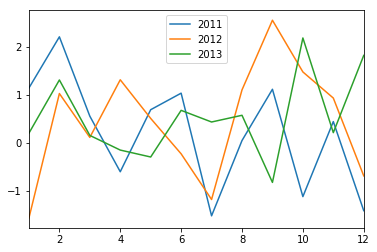

In [125]:
from matplotlib import pyplot as plt

pv.plot()
plt.show()

## [Apply](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#apply)

[Rolling Apply to Organize - Turning embedded lists into a multi-index frame](https://stackoverflow.com/questions/17349981/converting-pandas-dataframe-with-categorical-values-into-binary-values)

In [126]:
df = pd.DataFrame(data={'A' : [[2,4,8,16],[100,200],[10,20,30]], 
                        'B' : [['a','b','c'],['jj','kk'],['ccc']]},
                  index=['I','II','III'])
df

,A,B
I,"[2, 4, 8, 16]","[a, b, c]"
II,"[100, 200]","[jj, kk]"
III,"[10, 20, 30]",[ccc]


In [127]:
def SeriesFromSubList(aList):
    return pd.Series(aList)

organized_df = pd.concat(dict([(ind,row.apply(SeriesFromSubList)) for ind,row in df.iterrows()])); organized_df

0    1    2     3
I   A    2    4    8  16.0
    B    a    b    c   NaN
II  A  100  200  NaN   NaN
    B   jj   kk  NaN   NaN
III A   10   20   30   NaN
    B  ccc  NaN  NaN   NaN

[Rolling Apply with a DataFrame returning a Series](https://stackoverflow.com/questions/19121854/using-rolling-apply-on-a-dataframe-object)

Rolling Apply to multiple columns where the function calculates a Series before a Scalar from the series is returned.

In [128]:
df = pd.DataFrame(data=np.random.randn(2000,2)/10000,
                 index=pd.date_range('2001-01-01',periods=2000),
                 columns=['A','B'])
df.head()

,A,B
2001-01-01,0.000133,-0.000031
2001-01-02,0.000062,0.000081
2001-01-03,0.000007,-0.000059
2001-01-04,-0.000010,0.000069
2001-01-05,-0.000123,0.000130


In [129]:
def gm(aDF,Const):
    v = ((((aDF.A+aDF.B)+1).cumprod())-1)*Const
    return (aDF.index[0],v.iloc[-1])

S = pd.Series(dict([gm(df.iloc[i:min(i+51,len(df)-1)],5) for i in range(len(df)-50)])); S

2001-01-01    0.009481
2001-01-02    0.007535
2001-01-03    0.006795
2001-01-04    0.006974
2001-01-05    0.007023
2001-01-06    0.006286
2001-01-07    0.005351
2001-01-08    0.004387
2001-01-09    0.003903
2001-01-10    0.003239
2001-01-11    0.003255
2001-01-12    0.002563
2001-01-13    0.001948
2001-01-14    0.000788
2001-01-15    0.000123
2001-01-16    0.000665
2001-01-17    0.001975
2001-01-18    0.001575
2001-01-19    0.000274
2001-01-20    0.002115
2001-01-21    0.001174
2001-01-22    0.002516
2001-01-23    0.003828
2001-01-24    0.002454
2001-01-25    0.002989
2001-01-26    0.002318
2001-01-27    0.004395
2001-01-28    0.004536
2001-01-29    0.004143
2001-01-30    0.002491
                ...   
2006-04-05   -0.000051
2006-04-06   -0.001108
2006-04-07   -0.000158
2006-04-08    0.000362
2006-04-09    0.000146
2006-04-10    0.002101
2006-04-11    0.002829
2006-04-12    0.002686
2006-04-13    0.002126
2006-04-14    0.001804
2006-04-15    0.001169
2006-04-16   -0.000066
2006-04-17 

[Rolling Apply with a DataFrame returning a Scalar](https://stackoverflow.com/questions/21040766/python-pandas-rolling-apply-two-column-input-into-function/21045831#21045831)

Rolling Apply to multiple columns where the function returns a scalar, the Volume Weighted Average Price 

In [130]:
rng = pd.date_range(start='2014-01-01',periods=100)
rng[:5]

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05'],
              dtype='datetime64[ns]', freq='D')

In [131]:
df = pd.DataFrame({'Open' : np.random.randn(len(rng)),
                  'Close' : np.random.randn(len(rng)),
                  'Volume' : np.random.randint(100,2000,len(rng))},index=rng)
df.describe()

,Close,Open,Volume
count,100.000000,100.000000,100.000000
mean,-0.012004,0.167170,996.650000
std,0.925813,1.030932,536.569338
min,-2.386093,-2.127992,119.000000
25%,-0.702961,-0.536049,520.250000
50%,0.017168,0.068018,971.000000
75%,0.668705,0.692569,1506.750000
max,2.162964,2.935442,1985.000000


In [132]:
def vwap(bars) : return ((bars.Close*bars.Volume).sum()/bars.Volume.sum())
window = 5
s = pd.concat([(pd.Series(vwap(df.iloc[i:i+window]),
                          index=[df.index[i+window]]))
               for i in range(len(df)-window)])
s.round(2)

2014-01-06    0.14
2014-01-07   -0.02
2014-01-08    0.12
2014-01-09    0.13
2014-01-10   -0.34
2014-01-11   -0.86
2014-01-12   -0.81
2014-01-13   -0.90
2014-01-14   -1.16
2014-01-15   -1.18
2014-01-16   -0.86
2014-01-17   -0.52
2014-01-18   -0.24
2014-01-19    0.27
2014-01-20    0.47
2014-01-21    0.61
2014-01-22    0.89
2014-01-23    0.76
2014-01-24    0.55
2014-01-25    0.37
2014-01-26    0.15
2014-01-27    0.21
2014-01-28    0.54
2014-01-29    0.85
2014-01-30    0.97
2014-01-31    0.52
2014-02-01    0.18
2014-02-02    0.21
2014-02-03   -0.30
2014-02-04   -1.05
              ... 
2014-03-12   -1.17
2014-03-13   -1.51
2014-03-14   -1.20
2014-03-15   -0.07
2014-03-16    0.00
2014-03-17    0.23
2014-03-18    0.44
2014-03-19    0.37
2014-03-20    0.05
2014-03-21    0.48
2014-03-22    0.70
2014-03-23    0.83
2014-03-24    0.65
2014-03-25    0.46
2014-03-26    0.02
2014-03-27   -0.70
2014-03-28   -0.50
2014-03-29   -0.51
2014-03-30   -0.47
2014-03-31   -0.39
2014-04-01   -0.59
2014-04-02  

## [Timeseries](https://pandas.pydata.org/pandas-docs/stable/cookbook.html#timeseries)

But first, a quick demonstration of how to create example (mock) data.  
To create a dataframe from every combination of some given values, like R's `expand.grid()` function, we can create a dict where the keys are the column names and the values are lists of the data values.

In [133]:
def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

df = expand_grid({'height' : [60,70],
                 'weight' : [100,140,180],
                 'sex' : ['Male','Female']})

df.describe()

,height,weight
count,12.00000,12.000000
mean,65.00000,140.000000
std,5.22233,34.112115
min,60.00000,100.000000
25%,60.00000,100.000000
50%,65.00000,140.000000
75%,70.00000,180.000000
max,70.00000,180.000000


In [134]:
df.head(10)

,height,weight,sex
0,60,100,Male
1,60,100,Female
2,60,140,Male
3,60,140,Female
4,60,180,Male
5,60,180,Female
6,70,100,Male
7,70,100,Female
8,70,140,Male
9,70,140,Female


Now, back to the Timeseries stuff.  
Here is the pandas [Time Series / Date functionality documentation](https://pandas.pydata.org/pandas-docs/stable/timeseries.html).  
Let's start by dropping the rows that *aren't* inside the time range that we want.  
[Between times](https://stackoverflow.com/questions/14539992/pandas-drop-rows-outside-of-time-range)

In [135]:
import datetime

ts.between_time(datetime.time(18), datetime.time(9), include_start=False, include_end=False)

2018-07-10 00:00:00    0
2018-07-10 00:02:00    1
2018-07-10 00:04:00    2
2018-07-10 00:06:00    3
2018-07-10 00:08:00    4
2018-07-10 00:10:00    5
2018-07-10 00:12:00    6
2018-07-10 00:14:00    7
2018-07-10 00:16:00    8
2018-07-10 00:18:00    9
Freq: 2T, dtype: int64

In [136]:
rng = pd.date_range('1/1/2000', periods=24, freq='H'); rng

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:00:00',
               '2000-01-01 02:00:00', '2000-01-01 03:00:00',
               '2000-01-01 04:00:00', '2000-01-01 05:00:00',
               '2000-01-01 06:00:00', '2000-01-01 07:00:00',
               '2000-01-01 08:00:00', '2000-01-01 09:00:00',
               '2000-01-01 10:00:00', '2000-01-01 11:00:00',
               '2000-01-01 12:00:00', '2000-01-01 13:00:00',
               '2000-01-01 14:00:00', '2000-01-01 15:00:00',
               '2000-01-01 16:00:00', '2000-01-01 17:00:00',
               '2000-01-01 18:00:00', '2000-01-01 19:00:00',
               '2000-01-01 20:00:00', '2000-01-01 21:00:00',
               '2000-01-01 22:00:00', '2000-01-01 23:00:00'],
              dtype='datetime64[ns]', freq='H')

In [137]:
ts = pd.Series(pd.np.random.randn(len(rng)), index=rng); ts

2000-01-01 00:00:00    1.610792
2000-01-01 01:00:00   -0.297500
2000-01-01 02:00:00    0.673230
2000-01-01 03:00:00    0.334017
2000-01-01 04:00:00   -0.794952
2000-01-01 05:00:00    0.821190
2000-01-01 06:00:00    0.691813
2000-01-01 07:00:00   -0.832754
2000-01-01 08:00:00    0.495215
2000-01-01 09:00:00   -1.527983
2000-01-01 10:00:00    0.030254
2000-01-01 11:00:00   -0.535011
2000-01-01 12:00:00    0.355244
2000-01-01 13:00:00    1.293723
2000-01-01 14:00:00   -0.145529
2000-01-01 15:00:00   -1.089076
2000-01-01 16:00:00   -1.848779
2000-01-01 17:00:00    0.408063
2000-01-01 18:00:00    1.104601
2000-01-01 19:00:00   -1.547581
2000-01-01 20:00:00    2.236569
2000-01-01 21:00:00    1.268461
2000-01-01 22:00:00   -0.663476
2000-01-01 23:00:00   -1.397278
Freq: H, dtype: float64

In [138]:
# Select the rows from 10am to 2pm (inclusive:)
ts.iloc[ts.index.indexer_between_time(datetime.time(10), datetime.time(14))]

2000-01-01 10:00:00    0.030254
2000-01-01 11:00:00   -0.535011
2000-01-01 12:00:00    0.355244
2000-01-01 13:00:00    1.293723
2000-01-01 14:00:00   -0.145529
Freq: H, dtype: float64

In [139]:
# The same syntax works for a DataFrame:
df = pd.DataFrame(ts); df

,0
2000-01-01 00:00:00,1.610792
2000-01-01 01:00:00,-0.297500
2000-01-01 02:00:00,0.673230
2000-01-01 03:00:00,0.334017
2000-01-01 04:00:00,-0.794952
2000-01-01 05:00:00,0.821190
2000-01-01 06:00:00,0.691813
2000-01-01 07:00:00,-0.832754
2000-01-01 08:00:00,0.495215
2000-01-01 09:00:00,-1.527983


In [140]:
df.iloc[df.index.indexer_between_time(datetime.time(10), datetime.time(14))]

,0
2000-01-01 10:00:00,0.030254
2000-01-01 11:00:00,-0.535011
2000-01-01 12:00:00,0.355244
2000-01-01 13:00:00,1.293723
2000-01-01 14:00:00,-0.145529


[Using indexer between time](https://stackoverflow.com/questions/17559885/pandas-dataframe-mask-based-on-index)

Create a mask to only consider the rows where the index falls within a certain range.

In [141]:
index = pd.date_range('2013-1-1',periods=10,freq='15Min'); index

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 00:15:00',
               '2013-01-01 00:30:00', '2013-01-01 00:45:00',
               '2013-01-01 01:00:00', '2013-01-01 01:15:00',
               '2013-01-01 01:30:00', '2013-01-01 01:45:00',
               '2013-01-01 02:00:00', '2013-01-01 02:15:00'],
              dtype='datetime64[ns]', freq='15T')

In [142]:
data = pd.DataFrame(data=[1,2,3,4,5,6,7,8,9,0],columns=['value'],index=index); data

,value
2013-01-01 00:00:00,1
2013-01-01 00:15:00,2
2013-01-01 00:30:00,3
2013-01-01 00:45:00,4
2013-01-01 01:00:00,5
2013-01-01 01:15:00,6
2013-01-01 01:30:00,7
2013-01-01 01:45:00,8
2013-01-01 02:00:00,9
2013-01-01 02:15:00,0


In [147]:
data.index.indexer_between_time(start_time='1:15',end_time='2:00')

array([5, 6, 7, 8])

In [148]:
data.iloc[data.index.indexer_between_time('1:15','2:00')]

,value
2013-01-01 01:15:00,6
2013-01-01 01:30:00,7
2013-01-01 01:45:00,8
2013-01-01 02:00:00,9


One trick to remember is that by setting `start_time` to be later than `end_time`, you can get the times that are *not* between the two times.  
This also works for `pandas.DataFrame.between_time()`.

[Constructing a datetime range that excludes weekends and includes only certain times](https://stackoverflow.com/questions/24010830/pandas-generate-sequential-timestamp-with-jump/24014440#24014440?)